<h1>An Introductory Analysis of Changes to the NBA</h1>

<h2> Introduction </h2>

The purpose of this project is to simply acquaint myself with both Python Data Analysis and the Jupyter Notebook. Conclusions will be made based on both the data as well as my own research, but they are not meant to be used for any meaningful Basketball-related conversations and/or debates.  

The reason why I chose to analyze sports data is because I am an avid sports enthusiast(not just for the data!), and particularly an NBA fan. I have been watching basketball since about 2004(Funny enough, the very first game I watched was Malice at the Palace. Bummed the home team lost, but I was hooked to say the least!), and so I've witnessed the changes that the game has gone through over the years. 

Because sports is a hot topic, there are enough discussions on the internet to help me understand whether the data I've encountered is reasonable or not, and while learning and going through Python data analysis, this is a good way to help reduce any unnecessary clutter and waste of time, though of course later on(both in this project and in future projects), I'll have no choice but to only estimate based on the data.

Lastly, I would like to thank people for reading this project! It is by no means a perfect project, and if there any suggestions or tips that you think may help me, by all means please send them!

With that being said, let's get started!

<h2> Topic Presentation </h2>

The project I'll be presenting today is a simple one: How has the NBA changed over the last 40 years? 

I chose the last 40 years as the range because the metrics and data we have are nearly complete only starting from 1980. Additionally, we will only work from 1980 to 2019, as the 2019-2020 NBA season was a season where games were played under different atmospheres and not every team competed in the same amount of games(the NBA Bubble only invited those in playoff contention). 

Continuing on, a simple Google search leads to many articles that discuss the changes to the game that have happened over the years. Because there are obviously so many changes that have happened over the last 40 years(with new inventions, technologies, etc.), I will analyze only a few topics, topics that are possibly analyzable through data. These topics are both topics that have come up in many discussions and also topics of my own curiosity. I want to see if the data we end up scraping/analyzing shows these conclusions. 

These topics are: 
    1) increase in 3 point attempts
    2) more rebounds
    3) decrease in two-pointers(aka the mid-range jumpers)
    4) free-throw attempts(and maybe the physicality?)    
    5) changes in field goal percentages
    6) speed of the game has changed
    7) usage rate(is there more "ball-hogging", aka a greater dependence on only a few team members?)

<h2> Beginning Steps </h2>

The website we will be using today to retrieve data from is Basketball Reference. For the purposes of explanation, I will present the 2018-2019 season stats. 
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html

On the above link, there is a single table with many columns and every NBA player who played that season. You may notice that multiple players are repeated, and that's because they were traded mid-season to another team. There are actually 530 NBA players who played during that particular season. We will figure out what to do with this in a few steps. For now, we will start the scraping process. 

At the very beginning, we will need to import the appropriate packages. 

Next, because we want data from 1980 to 2019, we will implement the for-loop, as we know the range we are working with. This way, I don't enter the same code over and over again. I will also insert the url we can use to fetch the data. One cool thing for the website url is that all we need to change in the url to access a particular year's stats is that particular year.

For example, 2019's stats can be accessed here: https://www.basketball-reference.com/leagues/NBA_2019_per_game.html
If we wanted to look at, say, 1998: https://www.basketball-reference.com/leagues/NBA_1998_per_game.html

We can use a particular feature to help us insert the appropriate year into the url, as we will see.

Even though my end-program uses a for-loop, for the purposes of demonstration, I will walk through the 2018-2019 case. I will post my entire code at the end of this document. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

year = 2019
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'
url = str.format(year)

<h2> Scraping the Data </h2>

Next, we will read in the website's contents into a dataframe. 

In [5]:
df = pd.read_html(url, header = 0)
df

[      Rk        Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  ORB  \
 0      1  Álex Abrines  SG  25  OKC  31   2  19.0  1.8   5.1  ...  .923  0.2   
 1      2    Quincy Acy  PF  28  PHO  10   0  12.3  0.4   1.8  ...  .700  0.3   
 2      3  Jaylen Adams  PG  22  ATL  34   1  12.6  1.1   3.2  ...  .778  0.3   
 3      4  Steven Adams   C  25  OKC  80  80  33.4  6.0  10.1  ...  .500  4.9   
 4      5   Bam Adebayo   C  21  MIA  82  28  23.3  3.4   5.9  ...  .735  2.0   
 ..   ...           ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...  ...   
 729  528  Tyler Zeller   C  29  MEM   4   1  20.5  4.0   7.0  ...  .778  2.3   
 730  529    Ante Žižić   C  22  CLE  59  25  18.3  3.1   5.6  ...  .705  1.8   
 731  530   Ivica Zubac   C  21  TOT  59  37  17.6  3.6   6.4  ...  .802  1.9   
 732  530   Ivica Zubac   C  21  LAL  33  12  15.6  3.4   5.8  ...  .864  1.6   
 733  530   Ivica Zubac   C  21  LAC  26  25  20.2  3.8   7.2  ...  .733  2.3   
 
      DRB  TRB  AST  STL  

<h2> Cleaning Up the Data for Use </h2>

Additionally, we have an issue where every 20 or so lines, the header showing each category shows up, but we do not want this in our excel sheet, as it may mess up our analyses. What we will do is create a new dataframe which is equal to the header line. Next, we will remove from our original dataframe the values where under the category 'Age', the value is "Age".

In [6]:
df2019 = df[0]
df= df2019.drop(df2019[df2019.Age == 'Age'].index)

We will also fill up any 'NaN' values with '0', and drop the "Rk" column as it doesn't help us at all. 

In [7]:
df = df.fillna(0)
df = df.drop(['Rk'], axis = 1)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


Lastly, I mentioned before that we have multiple players whose names are repeated because they were traded to another team mid-season(as seen in the very last entry, "Ivica Zubac"). Luckily, Basketball Reference has compiled the total, full-season statistics and averages for the traded players, regardless of what team they were on. These players are listed under the Team 'Tot', for total. What we'll do is only keep the traded players on Team 'Tot', as those averages best capture the player for the season. 

While this is easy to do, a rare case that I had discovered was that during a few seasons, there were multiple players with the same exact names(ex. two people named George Johnson in 1981). While I didn't look through every year to find players with the same names, a reasonable estimate is to assume that these players were of different ages. My program will remove anyone with the same-name AND same-age. This filter is the easiest to implement, and because same-name AND same-age is a highly rare case, any possible omission of this data, where data points number roughly 15k-20k, will not affect our end result. 

In [8]:
df = df.drop_duplicates(['Player', 'Age'], 'first')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Trae Young,PG,20,ATL,81,81,30.9,6.5,15.5,.418,...,.829,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1
726,Cody Zeller,C,26,CHO,49,47,25.4,3.9,7.0,.551,...,.787,2.2,4.6,6.8,2.1,0.8,0.8,1.3,3.3,10.1
727,Tyler Zeller,C,29,TOT,6,1,15.5,2.7,5.0,.533,...,.778,1.8,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7
730,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8


As we can see, Ivica Zubac's stats show up only once, and it's the total, full-year average regardless of what team he played on. 

Next, we will write our data to an excel sheet, and read our data to use from that excel sheet, so that we can keep track of our changes. We will create another dataframe, df2, that will read in data from that excel sheet.

<h2> Transferring Our Data to an Excel Sheet </h2>

In [9]:
df.to_csv('nba2019.csv', index=False)
df2 = pd.read_csv('nba2019.csv')

<h2> Making the Code Easier to Read and Setting Up the Process to Present Data </h2>

Next, what we will do is define the columns to be analyzed. In this data set, we will analyze the following: 1) Average Three Point Attempts 2) Average Offensive Rebounds 3) Average Defensive Rebounds 4) Average Two Point Attempts 5) Average Free Throw Attempts 6) Average Field Goal Percentage 7) Average Effective Field Goal Percentage

What I will do is to present each bit of code for each member of the above list, along with the model of the statistics for that particular data, and then present a small, one paragraph analysis on validating my data. To make this easy, all the lines previously shown above will be placed into a function so as to reduce any unnecessary clutter and copy/paste. 

In order to present all data from 1980-2019, I will need to implement the for-loop here. I will present my code inside a for-loop implementing everything we discussed so far. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def perGameData(column_name, plot_title, plot_number):
    for x in range(1980, 2020):
        year = x
        str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'
        url = str.format(year)
        df = pd.read_html(url, header = 0)
        df2019 = df[0]
        df= df2019.drop(df2019[df2019.Age == 'Age'].index)
        df = df.fillna(0)
        df = df.drop(['Rk'], axis = 1)
        df = df.drop_duplicates(['Player', 'Age'], 'first')
        df.to_csv('nba2019.csv', index=False)
        df2 = pd.read_csv('nba2019.csv')
    #All lines of code up to this line was previously presented. If you have any questions, please go back and read my reasoning
    #for these lines, or email me and I'll get back to you as soon as I can. The lines below will implement everything I just 
    #finished talking about. 
        average = df2[column_name]
        plt.figure(plot_number)
        plt.title(plot_title)
        plt.scatter(year, average.mean())

<h2> Data Presentation and Analysis </h2>

<h3> Has there been any changes in three-point attempts? </h3>

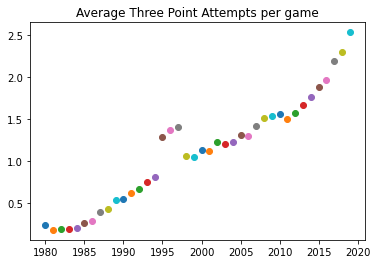

In [11]:
perGameData('3PA', 'Average Three Point Attempts per game', 0)

The word on the street is that the NBA has become a place where three-pointers are valued more and more, and the data we have scraped indeed shows a mostly steady increase over the years in three point attempts. There is a group of outliers between 1995 and 1997, though. What gives? Turns out the three point line was redrawn a foot closer to the hoop, which encouraged more people(at the time, at least) to shoot threes. Later, because scores actually lower, the three point line was redrawn back to the pre-1995 distance, and has remained the same since. The year 2010 is when you can really see a higher change in 3 point attempts. This is because NBA defenses were annoying to the point where people were forced to shoot from beyond the arc. 

For more: https://www.cbssports.com/nba/news/what-the-shortened-nba-3-point-line-of-the-mid-1990s-says-about-the-future-of-long-range-shooting/

https://clutchpoints.com/brief-time-90s-3-point-line-shorter/

<h3> How have rebounds changed over the years? </h3>

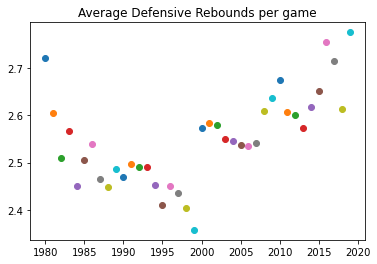

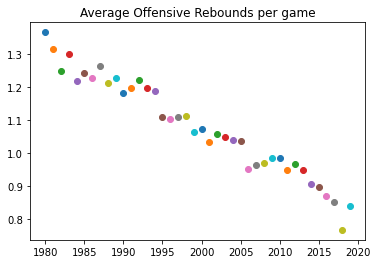

In [12]:
perGameData('DRB', 'Average Defensive Rebounds per game', 1)
perGameData('ORB', 'Average Offensive Rebounds per game', 2)

In the first case, we see a decrease in Average Defensive Rebounds per year. One possible explanation is that players were a lot more likely to attempt, as well as make, two-point shots than three-pointers, and so there were less misses(and misses are what lead to defensive rebounds). From about 2000-2010, there were some fluctuations, which, more or less, seem to fall in line with the slight fluctuations in Three Point Attempts during the same years. Around 2010, we can see a mostly solid increase in Defensive Rebounds. This is likely attributed to the fact that more three-point attempts were made, and more misses, which led to higher rebounds by the opponent. 

On the other hand, there is a mostly strict inverse relationship between Average Offensive Rebounds and year. This has to be attributed to the fact that defensive rebounds were trending upwards, in turn because three-point attempts were increasing, shots which were more likely to miss. It's already the case that defensive rebounds outnumber offensive rebounds by a roughly 2:1 ratio. More misses likely lead to greater defensive rebounds. I would like to see if I can somehow attain shot placement data so I can analyze this further, but I digress. 

<h3> Have two-point attempts changed dropped, increased, or remained constant? </h3>

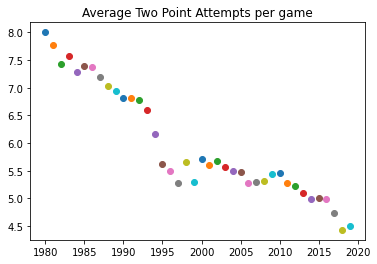

In [13]:
perGameData('2PA', 'Average Two Point Attempts per game', 3)

Overall, two-point attempts per game have dropped by nearly 50% over the last 40 years. This is likely because the three-point attempts have gone up by a lot. However, something I would like to get back to is whether there is data on mid-range jumpers and paint shots. My knowledge(as a fan) is that mid-range jumpers have gone down drastically over the years. Paint shots and dunks still remain. There are few players in the NBA who rely heavily on mid-rangers(DeMar Derozan and LaMarcus Aldridge come to mind!). These days, a lot of players have started to distance their shots, and this has led to a downward trend in overall two-point attempts, fueled in part by a drastic decrease in the mid-range shot. 

<h3> What About Free-Throw Attempts? Can we conclude anything about physicality? </h3>

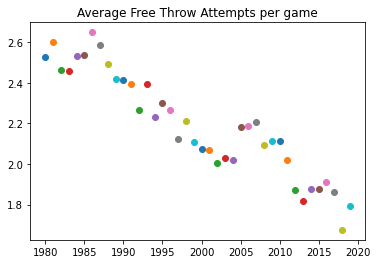

In [14]:
perGameData('FTA', 'Average Free Throw Attempts per game', 4)

I wanted to analyze the physicality of the game. I've heard comments like "the league is soft" and the like, and wanted to analyze this through data. The results show that free throw attempts per game have gone down. There is an increase around 2004-2005, and that can be attributed to the introduction of the Hand-Check Penalty, where a defender can't touch an opponent unless he's near the basket(I assume in the paint). Other than that, it has mostly trended downwards. One factor is that more shots are three-point attempts, so there is a smaller chance of fouling someone on a three-pointer as opposed to driving to the paint. 

One interesting note is that these days, I'm seeing more and more flagrant 1/2 penalties, and maybe that's something I can analyze in the future. Maybe that's led to a drop in normal free-throw attempts. However, I'm still not 100% sure why there's a drop in free throw attempts, other than increase in three-point attempts, and maybe a decrease in two-point attempts. 

Final note: maybe there have been some unofficial(or even official) refereeing changes which we don't know about that have led to a drop in free-throw attempts. This is an interesting case for sure, and definitely most surprising! I simply don't know enough about the data to make a definitive conclusion about the physicality of the game(though anything remotely similar to Malice at the Palace is definitely a thing of the past!). This is something I definitely plan to get back to.

<h3> Any changes in field-goal percentages? </h3>

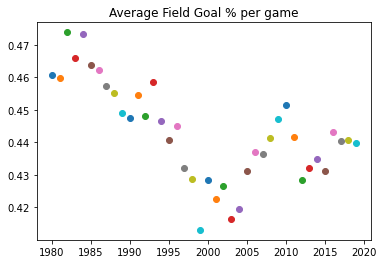

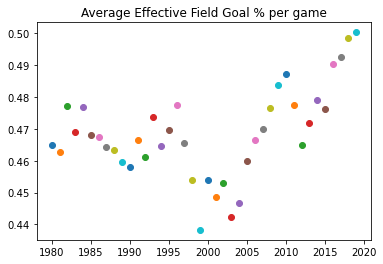

In [15]:
perGameData('FG%', 'Average Field Goal % per game', 5)
perGameData('eFG%', 'Average Effective Field Goal % per game', 6)

The trend in Field Goal% seems to make sense, as three-pointers have taken a greater and greater role in the game. These are harder to make than two pointers and dunks, so naturally players will hit less of their shots than historically, since more of their attempts are three-point attempts. 

On the other hand, the effective-field goal% takes into account the fact that three-pointers are worth more than two-pointers. These have been trending upwards since about 2010, and that's because more and more three-pointers have been attempted. 

Both of these plots show trends that are in line with what I have been watching in NBA games over the past decade and a half. 

<h3> How has the game's pace changed over the years? Has it gotten faster, slower, constant? </h3>

We have exhausted our need for the "per-game" table. We will now move on to using another table, and therefore another link. 
https://www.basketball-reference.com/leagues/NBA_2019.html

In that link, we want to head to the "Miscellaneous Stats" table, where we will be analyzing how the pace has changed throughout the years(increase or decrease in possessions per game, aka faster or slower(teams holding the ball for longer)). 

While the process is the same, I must point out that the link contains multiple tables, and surely I won't be needing all tables on the page! Additionally, on our previous link, there was only one page, so there wasn't much thinking required. Here, I can't use the same process because the website is dynamic, meaning as the season progresses, data will keep changing. As a result, I will need to find a workaround. Luckily, Basketball Reference allows us to use a URL that links to the particular table we would like to scrape, and scrape it as if it is static. 

Here is that link: https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_{}.html&div=div_misc_stats&del_row=1,33&del_col=1

The keen observers may see that the table contains the league average, which we don't necessarily want in our analysis. What I did was I modified the above link so that that row, in addition to the very top row which contains some headers which we won't need, are deleted. I also deleted an extra rank column that would also not help us. The modifications are seen at the end of the above link. Again, I also modified the link so that I can easily add what ever year I want, like last time. 

Since there is only one thing I want from that table, I won't be needing to write a function. As a result, most of the code will be very similar to what I've presented already. 

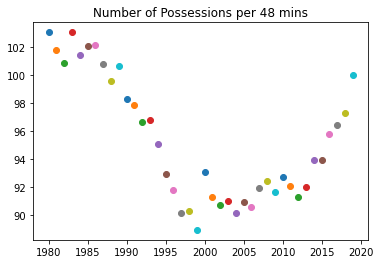

In [16]:
for x in range(1980, 2020):
    year = x
    str = 'https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_{}.html&div=div_misc_stats&del_row=1,33&del_col=1'
    url = str.format(year)
    df = pd.read_html(url, header = 0)
    df = df[0]
    df.to_csv('nba2019.csv', index=False)
    df2 = pd.read_csv('nba2019.csv')
    averagepace = df2['Pace']
    plt.scatter(year, averagepace.mean())
    plt.title('Number of Possessions per 48 mins')

The number of possessions were high in the early 80s, then dropped drastically into the 1990s. It picked up just a bit in the early 2000s, and it has somewhat skyrocketed in recent years, likely due to there being more attempts in threes, and likely due to teams often chucking the ball with no thought(looking at you, Steph Curry). The '80s Celtics and Lakers were relatively fast-paced teams, and teams needed to catch up to that pace in order to compete with them. Slower teams tended not to make the playoffs. 

On the other hand, Jordan's Bulls were very slow-paced, and teams needed to attempt to emulate the Bulls' pace in order to compete with them. In fact, in 1993, the Champions Chicago Bulls had the slowest pace in the entire NBA. A majority of the teams that made the playoffs during this period were among the slower-paced teams. However, none of those teams had Jordan :). 

By 1994, no team in the NBA had pace of 100 or higher possessions per 48 mins. Games from the 1990s/2000s were played very carefully and methodically. 

Fun fact: My very own Detroit Pistons won the 2004 championship while boasting a pace of 87.9 possesions per game. Turns out the 2003-2004 year was the third slowest league-average pace in history.
https://www.lineups.com/articles/why-nba-game-pace-is-at-historic-high/   

These days, pace is high because the three-point shots take less time to attempt, allowing more possessions per game. Coaches like Mike D'Antoni and Tom Thibodeau are seen has having contributed to this rise in pace. D'Antoni due to his "7 seconds or less" schemes, and Thibodeau due to his stifling defenses which left perimeters wide open for the three. Additionally, Stephen Curry and his seemingly nonchalant way of chucking(and unfortunately, making) three-pointers are also seen as a factor. 

<h3> Have players touched the ball more often these days, or less? </h3>

Lastly, I will be analyzing how Player Usage Rate has changed over the years. This will analyze how long a player has the ball. This could also be used to analyze dependence on certain players as opposed to the whole team. For this data, we will need to head over to the Big Boy table, aka the Advanced Stats. However, we will use the same methods as last time, and only a different link. 

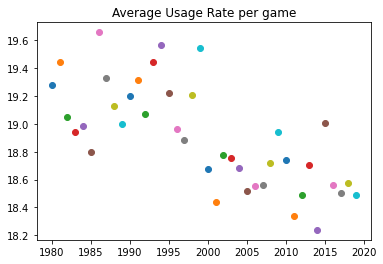

In [17]:
for x in range(1980, 2020):
    year = x
    str = 'https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_{}_advanced.html&div=div_advanced_stats'
    url = str.format(year)
    df = pd.read_html(url, header = 0)
    df2019 = df[0]
    df2019[df2019.Age == 'Age']
    df= df2019.drop(df2019[df2019.Age == 'Age'].index)
    df.to_csv('nba2019_2.csv', index=False)
    df2 = pd.read_csv('nba2019_2.csv')
    averageoutput = df2['USG%']
    plt.scatter(year, averageoutput.mean())
    plt.title('Average Usage Rate per game')

We can see that the data has trended overall somewhat negatively(though it absolutely is scattered all over the place!). It has dropped from about 20% to about 18%. This may mean that less players may get the ball, and possibly that "superstars", or those in all-star to MVP discussions will disproportionately get the ball more often then the "supporting cast", which a great majority of the NBA falls under. For example, in the 2018-2019, James Harden had a 40.5% usage rate. This means the Houston Rockets offense is somewhat dependant on the performance of James Harden. We may conclude that a lot of Houston's plays are designed to go through James Harden. Generally, all-star caliber players will have a greater usage rate.  

<h2> Summary and Concluding Thoughts </h2>

In summary, my data has validated the claims I have considered in regards to how the NBA has changed over the years. King among these changes(and the data has shown a lot) is that the three-point shot has taken over the NBA, and the NBA offense has essentially focused on the three-point shot. That being said, it has been interesting to see the various "eras" of the NBA, from fast in the 1980s to very slow and methodical in the 1990s and 2000s, followed by an increasing trend in pace, close to the 1980s pace even. 

While successfully validating NBA data has been fun and informational(I learned a lot of cool things that I previously didn't know about!), more important is that I was able to develop and use my Python skills to focus on a project of my own choosing and interest. Throughout this process, I learned of the various steps taken in Data Analysis: Scraping/Cleaning Data, Exploratory Data Analysis, Validating, and Reporting. In the end, I hope that I was able to illustrate these steps in my presentation and I hope that future users can learn a thing or two from my analysis. 

If you made it this far, I would like to sincerely thank you for taking the time to read this. I know it was often VERY wordy, but I simply wanted to explain my reasonings as best as I could, and I hope I did that. If you have any questions about anything regarding my data analysis, or any suggestions for a future topic, please do not hesitate to contact me!

<h2> Final Code Attached Below </h2>

For completion's sake and for any future analyses, I have placed functions for the other two tables as well. That way, if I or anyone else wants to analyze any other data from the other two tables, all they would need to do is type in the appropriate column name, or call the method once again. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Function is used to analyze the NBA per game stats table.
def perGameData(column_name, plot_title, plot_number):
    for x in range(1980, 2020):
        year = x
        str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'
        url = str.format(year)
        df = pd.read_html(url, header = 0)
        df2019 = df[0]
        df= df2019.drop(df2019[df2019.Age == 'Age'].index)
        df = df.fillna(0)
        df = df.drop(['Rk'], axis = 1)
        df = df.drop_duplicates(['Player', 'Age'], 'first')
        df.to_csv('nba2019.csv', index=False)
        df2 = pd.read_csv('nba2019.csv')
    #All lines of code up to this line was previously presented. If you have any questions, please go back and read my reasoning
    #for these lines, or email me and I'll get back to you as soon as I can. The lines below will implement everything I just 
    #finished talking about. 
        average = df2[column_name]
        plt.figure(plot_number)
        plt.title(plot_title)
        plt.scatter(year, average.mean())

#This second part analyzes the miscellaneous stats table. 
def miscStatsTable(columnName, plotTitle, plotNumber)
    for x in range(1980, 2020):
        year = x
        str = 'https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_{}.html&div=div_misc_stats&del_row=1,33&del_col=1'
        url = str.format(year)
        df = pd.read_html(url, header = 0)
        df = df[0]
        df.to_csv('nba2019.csv', index=False)
        df2 = pd.read_csv('nba2019.csv')
        average = df2[columnName]
        plt.figure(plotNumber)
        plt.title(plotTitle)
        plt.scatter(year, average.mean())
       
#This final part analyzes the advanced stats table.
def advStatsTable(columnTitle, plotName, plotIndex)
    for x in range(1980, 2020):
        year = x
        str = 'https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_{}_advanced.html&div=div_advanced_stats'
        url = str.format(year)
        df = pd.read_html(url, header = 0)
        df2019 = df[0]
        df2019[df2019.Age == 'Age']
        df= df2019.drop(df2019[df2019.Age == 'Age'].index)
        df.to_csv('nba2019_2.csv', index=False)
        df2 = pd.read_csv('nba2019_2.csv')
        average = df2[columnTitle]
        plot.figure(plotIndex)
        plt.title(plotName)
        plt.scatter(year, average.mean())
        
#Calling the above functions
perGameData('3PA', 'Average Three Point Attempts per game', 0)
perGameData('DRB', 'Average Defensive Rebounds per game', 1)
perGameData('ORB', 'Average Offensive Rebounds per game', 2)
perGameData('2PA', 'Average Two Point Attempts per game', 3)
perGameData('FTA', 'Average Free Throw Attempts per game', 4)
perGameData('FG%', 'Average Field Goal % per game', 5)
perGameData('eFG%', 'Average Effective Field Goal % per game', 6)
miscStatsTable('Pace', 'Average Number of Possessions per 48 mins', 0)
advStatsTable('USG%', 'Average Usage Rate per player per Game', 0)